# COMP5318 Assignment 2

## Group 10: 520302040, 520356283

### Calculating the run time 

In [1]:
import time
Initial_Time = time.time()

### Importing the Libraries and Packages

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

#The following code is to filter all types of warnings to make the code look cleaner.
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.exceptions import UndefinedMetricWarning
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

### Unpacking the Dataset 

In [3]:
#Importing the pickle file to unpack the resources given.
import pickle

#Saving the data in their respective variables.
Train_Data=pd.read_pickle("emnist_train.pkl")
Test_Data=pd.read_pickle("emnist_test.pkl")

In [4]:
#Splitting the data as provided.
X_train = Train_Data["data"]
y_train = Train_Data["labels"]
X_test = Test_Data["data"]
y_test = Test_Data["labels"]

In [5]:
#Reshaping the data 
X_train = X_train.reshape(-1, 28, 28)
X_test = X_test.reshape(-1, 28, 28)

### Exploring the Dataset

In [6]:
image_idx = 0
image = X_train[image_idx]
label = y_train[image_idx]

In [7]:
label

50

In [8]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(100000, 28, 28)
(100000,)
(20000, 28, 28)
(20000,)


In [9]:
# Checking the unique values in 'Data'
np.unique(X_train)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [10]:
# Checking the unique values in 'Labels'
np.unique(y_train)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61], dtype=int64)

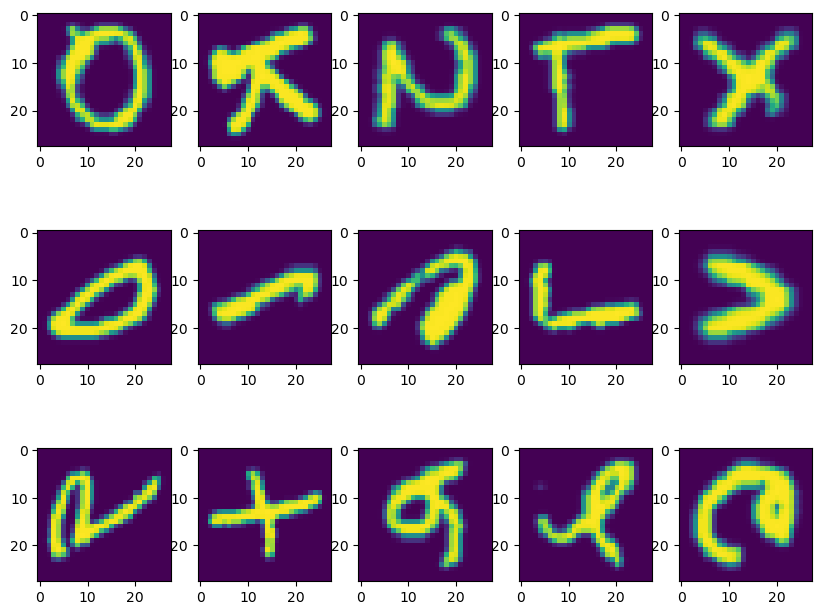

In [11]:
#Display images of the Training Data
fig,axes = plt.subplots(3,5,figsize=(10,8))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i].reshape([28,28]))

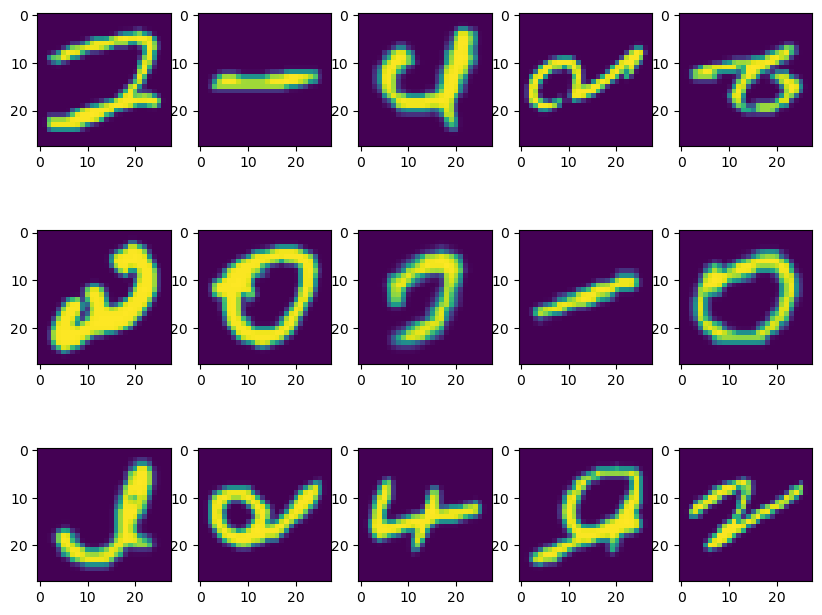

In [12]:
# Display images of the Testing Data
fig,axes = plt.subplots(3,5,figsize=(10,8))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape([28,28]))

### Data Preprocessing

#### Label Encoding

In [13]:
# Useful for the Naive Bayes Classifier to convert categorical variables into numerical variables for 'Labels'
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
Encoded_y_train = label_encoder.fit_transform(y_train)
Encoded_y_test = label_encoder.transform(y_test)

In [14]:
# Checking the encoded Labels
print("Encoded Training Labels:", Encoded_y_train)
print("Encoded Test Labels:", Encoded_y_test)

Encoded Training Labels: [50 20  5 ...  0  2 40]
Encoded Test Labels: [30  1  2 ...  2 34  4]


#### Normalisation

In [15]:
# There are a total of 255 features hence dividing by 255 to normalise pixel values between 0 and 1 for 'Data'. Useful for KNN.
Train_Images = X_train / 255.0
Test_Images = X_test / 255.0

#### Reshaping

In [16]:
# Reshaping the flattened feature arrays into 2D representation to restore original image shape. Useful for KNN.
X_Train_Images = Train_Images.reshape(Train_Images.shape[0], -1)
X_Test_Images = Test_Images.reshape(Test_Images.shape[0], -1)

In [17]:
print(X_Train_Images.shape)
print(X_Test_Images.shape)

(100000, 784)
(20000, 784)


#### Feature Scaling

In [18]:
# Useful for KNN. This improves accuracy, and help KNN to converge faster in the trainign process. 
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
Scaled_Train_Images = scaler.fit_transform(X_Train_Images)
Scaled_Test_Images = scaler.transform(X_Test_Images)

In [19]:
print("Scaled Training Features:\n", Scaled_Train_Images)
print("Scaled Test Features:\n", Scaled_Test_Images)

Scaled Training Features:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Scaled Test Features:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### Classification Models

In [20]:
from sklearn.model_selection import StratifiedKFold
#Setting the 10 fold stratified cross validation
Cross_Validation_Fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

#### Naive Bayes Classification Technique 

##### Original Model 

In [21]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

naive_bayes = MultinomialNB()
naive_bayes.fit(Scaled_Train_Images, Encoded_y_train)
y_pred_nb = naive_bayes.predict(Scaled_Test_Images)

accuracy_nb = accuracy_score(Encoded_y_test, y_pred_nb)
print("Accuracy:", accuracy_nb)

precision_nb = precision_score(Encoded_y_test, y_pred_nb, average='weighted')
print("Precision:", precision_nb)

recall_nb = recall_score(Encoded_y_test, y_pred_nb, average='weighted')
print("Recall:", recall_nb)

f1_nb = f1_score(Encoded_y_test, y_pred_nb, average='weighted')
print("F1 Score:", f1_nb)

print(classification_report(y_test, y_pred_nb))

cm_nb = confusion_matrix(y_test, y_pred_nb)
print(confusion_matrix(y_test, y_pred_nb))

Accuracy: 0.5172
Precision: 0.5986342354574439
Recall: 0.5172
F1 Score: 0.5368922551159929
              precision    recall  f1-score   support

           0       0.61      0.54      0.58       976
           1       0.52      0.58      0.55      1023
           2       0.90      0.47      0.62      1003
           3       0.83      0.73      0.78      1035
           4       0.79      0.48      0.59       903
           5       0.79      0.43      0.56       928
           6       0.88      0.64      0.74       959
           7       0.91      0.67      0.77      1098
           8       0.68      0.50      0.58       941
           9       0.67      0.75      0.71       929
          10       0.33      0.61      0.43       170
          11       0.19      0.54      0.28       118
          12       0.54      0.35      0.42       316
          13       0.37      0.48      0.41       128
          14       0.56      0.48      0.52       162
          15       0.38      0.23      0.29 

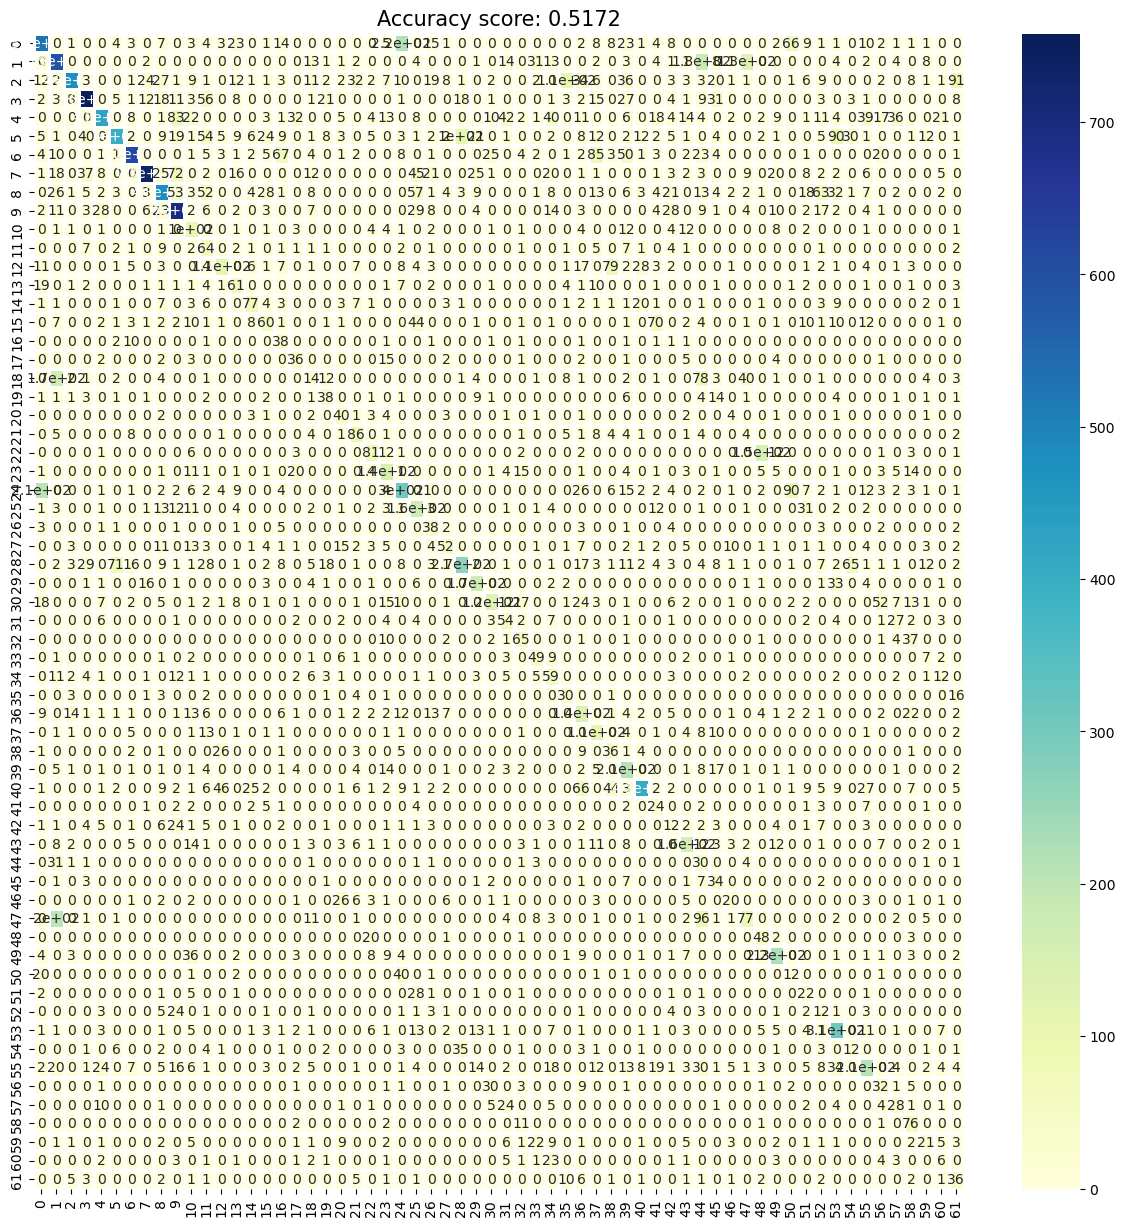

In [22]:
#viewing the heatmap of confusion matrix
plt.figure(figsize=(15,15))
sns.heatmap(cm_nb, annot = True, linewidth =1, cmap= 'YlGnBu')
plt.ylabel=('Actual Label');
plt.xlabel=('Predicted label');
all_sample_title = 'Accuracy score: {0}'.format(accuracy_nb)
plt.title(all_sample_title, size = 15);

##### Fine Tuned Model

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

param_grid = {
    'alpha': [0.1, 0.5, 1.0],
    'fit_prior': [True, False]
}

grid_search = GridSearchCV(naive_bayes, param_grid, cv=Cross_Validation_Fold)
grid_search.fit(Scaled_Train_Images, Encoded_y_train)

best_params_nb1 = grid_search.best_params_
best_model = grid_search.best_estimator_

y_best_pred_nb1 = best_model.predict(Scaled_Test_Images)

print('Best parameters:', best_params_nb1)

accuracy_nb1 = accuracy_score(Encoded_y_test, y_best_pred_nb1)
print("Accuracy:", accuracy_nb1)

precision_nb1 = precision_score(Encoded_y_test, y_best_pred_nb1, average='weighted')
print("Precision:", precision_nb1)

recall_nb1 = recall_score(Encoded_y_test, y_best_pred_nb1, average='weighted')
print("Recall:", recall_nb1)

f1_nb1 = f1_score(Encoded_y_test, y_best_pred_nb1, average='weighted')
print("F1 Score:", f1_nb1)

print(classification_report(y_test, y_best_pred_nb1))

cm_nb1 = confusion_matrix(y_test, y_best_pred_nb1)
print(confusion_matrix(y_test, y_best_pred_nb1))

Best parameters: {'alpha': 1.0, 'fit_prior': True}
Accuracy: 0.5172
Precision: 0.5986342354574439
Recall: 0.5172
F1 Score: 0.5368922551159929
              precision    recall  f1-score   support

           0       0.61      0.54      0.58       976
           1       0.52      0.58      0.55      1023
           2       0.90      0.47      0.62      1003
           3       0.83      0.73      0.78      1035
           4       0.79      0.48      0.59       903
           5       0.79      0.43      0.56       928
           6       0.88      0.64      0.74       959
           7       0.91      0.67      0.77      1098
           8       0.68      0.50      0.58       941
           9       0.67      0.75      0.71       929
          10       0.33      0.61      0.43       170
          11       0.19      0.54      0.28       118
          12       0.54      0.35      0.42       316
          13       0.37      0.48      0.41       128
          14       0.56      0.48      0.52    

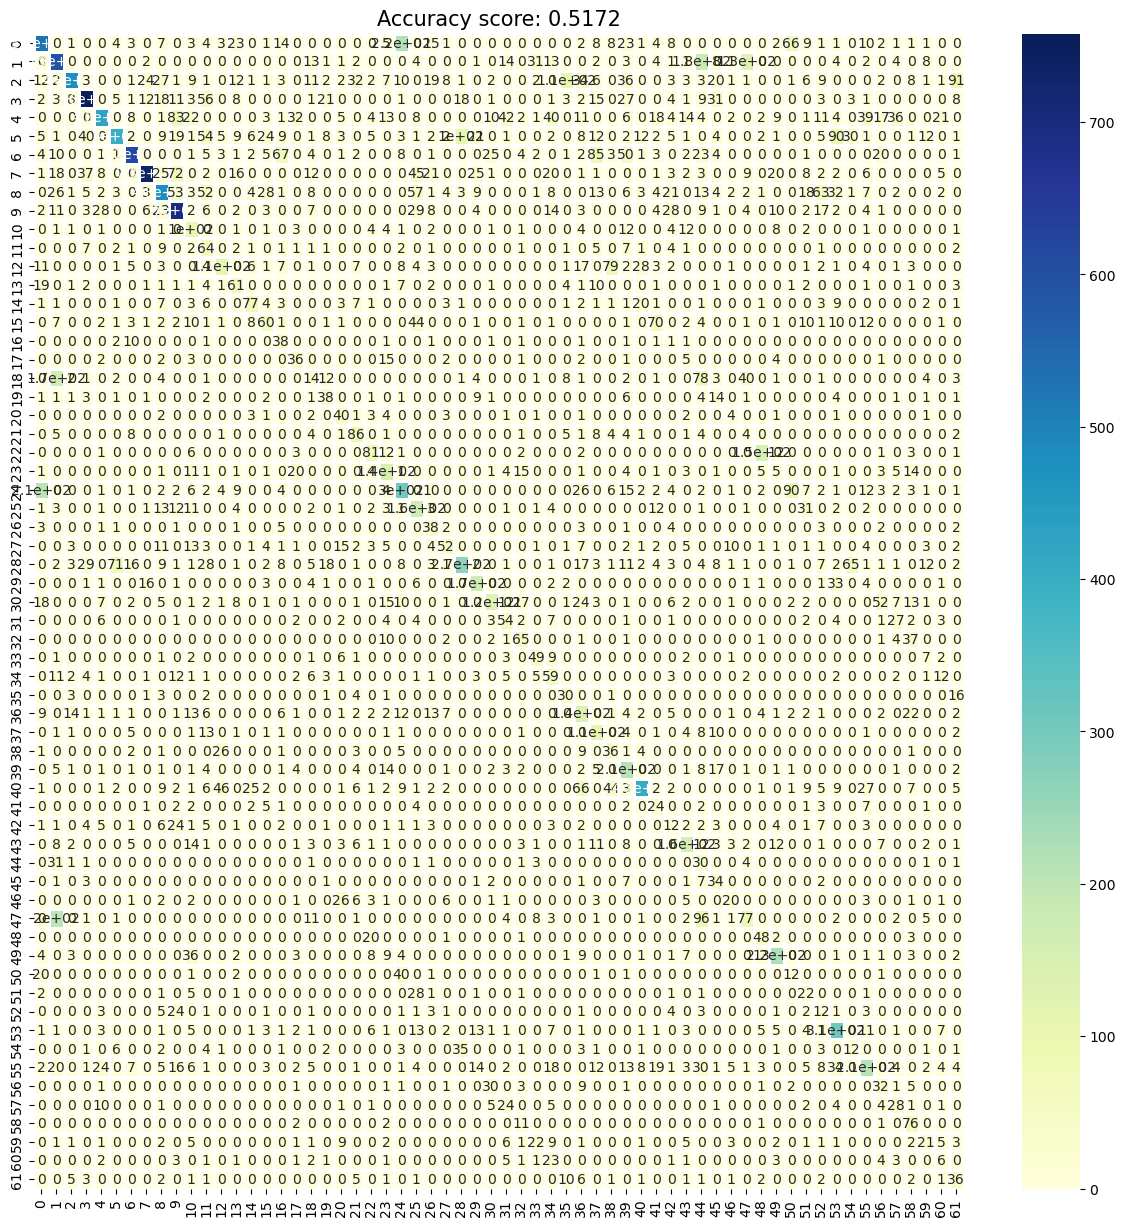

In [24]:
#viewing heatmap of confusion matrix
plt.figure(figsize=(15,15))
sns.heatmap(cm_nb1, annot = True, linewidth =1, cmap= 'YlGnBu')
plt.ylabel=('Actual Label');
plt.xlabel=('Predicted label');
all_sample_title = 'Accuracy score: {0}'.format(accuracy_nb1)
plt.title(all_sample_title, size = 15);

#### Random Forest Classification Technique

##### Original Model 

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(Scaled_Train_Images, Encoded_y_train)

y_pred_rf = random_forest.predict(Scaled_Test_Images)

accuracy_rf = accuracy_score(Encoded_y_test, y_pred_rf)
print("Accuracy:", accuracy_rf)

precision_rf = precision_score(Encoded_y_test, y_pred_rf, average='weighted')
print("Precision:", precision_rf)

recall_rf = recall_score(Encoded_y_test, y_pred_rf, average='weighted')
print("Recall:", recall_rf)

f1_rf = f1_score(Encoded_y_test, y_pred_rf, average='weighted')
print("F1 Score:", f1_rf)

print(classification_report(y_test, y_pred_rf))

cm_rf = confusion_matrix(y_test, y_pred_rf)
print(confusion_matrix(y_test, y_pred_rf))

Accuracy: 0.7947
Precision: 0.7770284307029045
Recall: 0.7947
F1 Score: 0.7711061231900168
              precision    recall  f1-score   support

           0       0.62      0.80      0.70       976
           1       0.65      0.92      0.76      1023
           2       0.84      0.96      0.89      1003
           3       0.91      0.96      0.94      1035
           4       0.83      0.95      0.89       903
           5       0.81      0.89      0.85       928
           6       0.89      0.97      0.93       959
           7       0.95      0.96      0.95      1098
           8       0.85      0.93      0.89       941
           9       0.86      0.96      0.91       929
          10       0.82      0.84      0.83       170
          11       0.87      0.34      0.49       118
          12       0.75      0.85      0.79       316
          13       0.86      0.43      0.57       128
          14       0.94      0.64      0.76       162
          15       0.80      0.76      0.78 

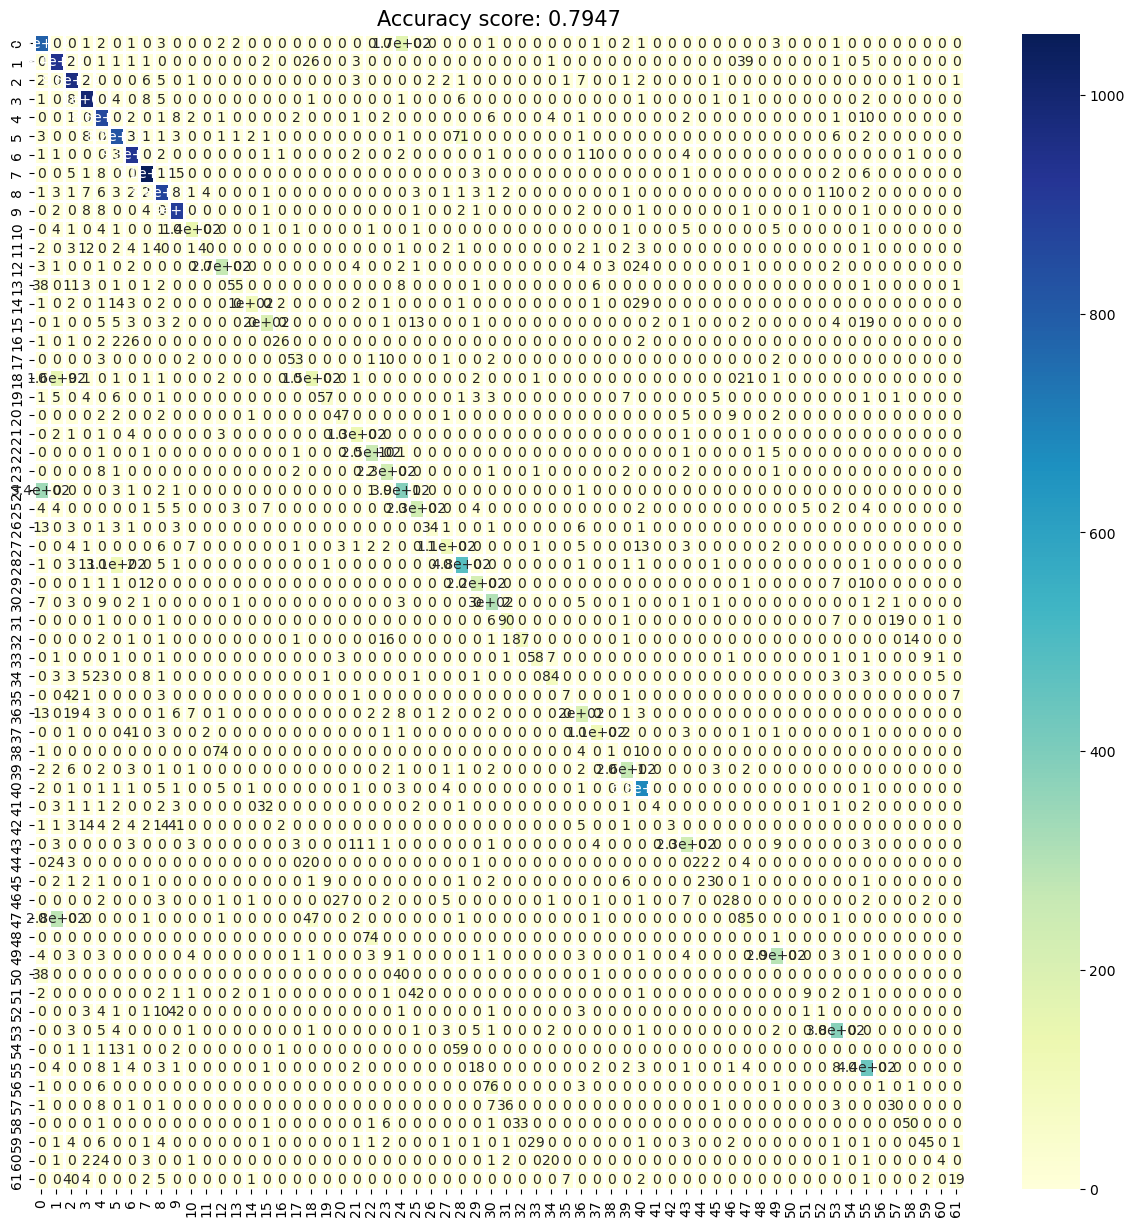

In [26]:
plt.figure(figsize=(15,15))
sns.heatmap(cm_rf, annot = True, linewidth =1, cmap= 'YlGnBu')
plt.ylabel=('Actual Label');
plt.xlabel=('Predicted label');
all_sample_title = 'Accuracy score: {0}'.format(accuracy_rf)
plt.title(all_sample_title, size = 15);

##### Fine Tuned Model

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

random_forest = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(random_forest, param_grid, cv=Cross_Validation_Fold)
grid_search.fit(Scaled_Train_Images, Encoded_y_train)
best_params_rf1 = grid_search.best_params_
best_model = grid_search.best_estimator_

y_best_pred_rf1 = best_model.predict(Scaled_Test_Images)

print('Best parameters:', best_params_rf1)

accuracy_rf1 = accuracy_score(Encoded_y_test, y_best_pred_rf1)
print("Accuracy:", accuracy_rf1)

precision_rf1 = precision_score(Encoded_y_test, y_best_pred_rf1, average='weighted')
print("Precision:", precision_rf1)

recall_rf1 = recall_score(Encoded_y_test, y_best_pred_rf1, average='weighted')
print("Recall:", recall_rf1)

f1_rf1 = f1_score(Encoded_y_test, y_best_pred_rf1, average='weighted')
print("F1 Score:", f1_rf1)

print(classification_report(y_test, y_best_pred_rf1))

cm_rf1 = confusion_matrix(y_test, y_best_pred_rf1)
print(confusion_matrix(y_test, y_best_pred_rf1))

Best parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.79875
Precision: 0.7793703154114677
Recall: 0.79875
F1 Score: 0.7750150539449473
              precision    recall  f1-score   support

           0       0.62      0.81      0.70       976
           1       0.65      0.93      0.77      1023
           2       0.84      0.96      0.89      1003
           3       0.91      0.97      0.94      1035
           4       0.85      0.95      0.90       903
           5       0.82      0.89      0.86       928
           6       0.89      0.97      0.93       959
           7       0.95      0.97      0.96      1098
           8       0.86      0.94      0.90       941
           9       0.87      0.97      0.92       929
          10       0.82      0.84      0.83       170
          11       0.84      0.36      0.51       118
          12       0.75      0.84      0.79       316
          13       0.90      0.44      0.59       128
          14  

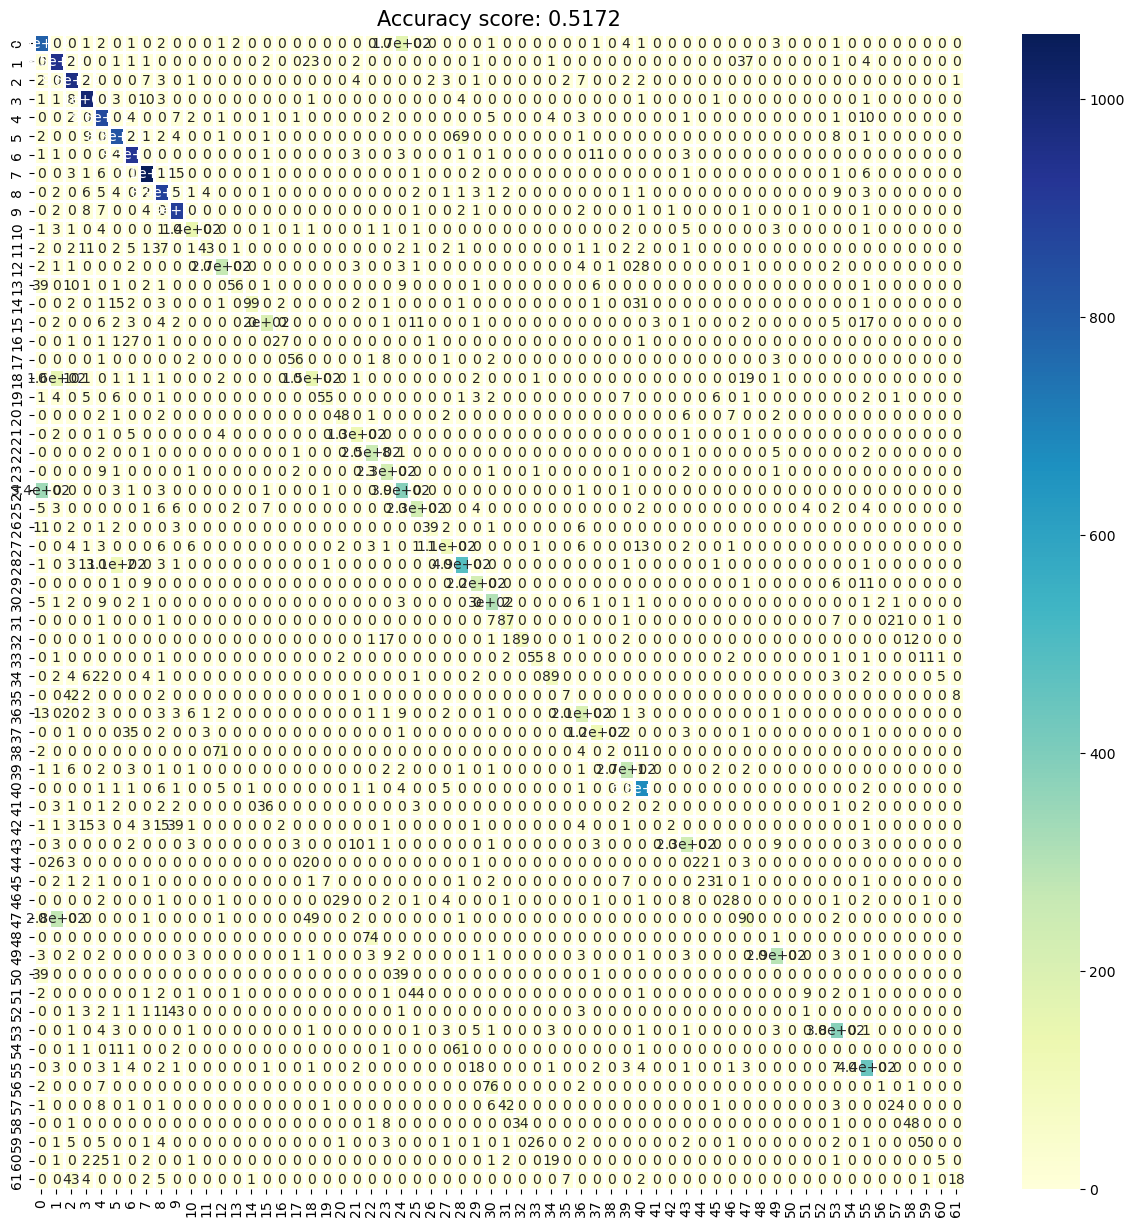

In [28]:
plt.figure(figsize=(15,15))
sns.heatmap(cm_rf1, annot = True, linewidth =1, cmap= 'YlGnBu')
plt.ylabel=('Actual Label');
plt.xlabel=('Predicted label');
all_sample_title = 'Accuracy score: {0}'.format(accuracy_nb1)
plt.title(all_sample_title, size = 15);

#### KNN Classification Technique 

##### Original Model 

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(Scaled_Train_Images, Encoded_y_train)
y_pred_knn = knn.predict(Scaled_Test_Images)

accuracy_knn = accuracy_score(Encoded_y_test, y_pred_knn)
print("Accuracy:", accuracy_knn)

precision_knn = precision_score(Encoded_y_test, y_pred_knn, average='weighted')
print("Precision:", precision_knn)

recall_knn = recall_score(Encoded_y_test, y_pred_knn, average='weighted')
print("Recall:", recall_knn)

f1_knn = f1_score(Encoded_y_test, y_pred_knn, average='weighted')
print("F1 Score:", f1_knn)

print(classification_report(y_test, y_pred_knn))

cm_knn = confusion_matrix(y_test, y_pred_knn)
print(confusion_matrix(y_test, y_pred_knn))

Accuracy: 0.7692
Precision: 0.7593865808347185
Recall: 0.7692
F1 Score: 0.7532891920125383
              precision    recall  f1-score   support

           0       0.58      0.75      0.65       976
           1       0.56      0.87      0.69      1023
           2       0.88      0.93      0.90      1003
           3       0.91      0.97      0.94      1035
           4       0.87      0.92      0.90       903
           5       0.83      0.83      0.83       928
           6       0.91      0.96      0.93       959
           7       0.92      0.97      0.94      1098
           8       0.93      0.90      0.92       941
           9       0.87      0.95      0.91       929
          10       0.85      0.74      0.79       170
          11       0.89      0.26      0.41       118
          12       0.67      0.82      0.74       316
          13       0.84      0.41      0.55       128
          14       0.96      0.64      0.77       162
          15       0.76      0.70      0.73 

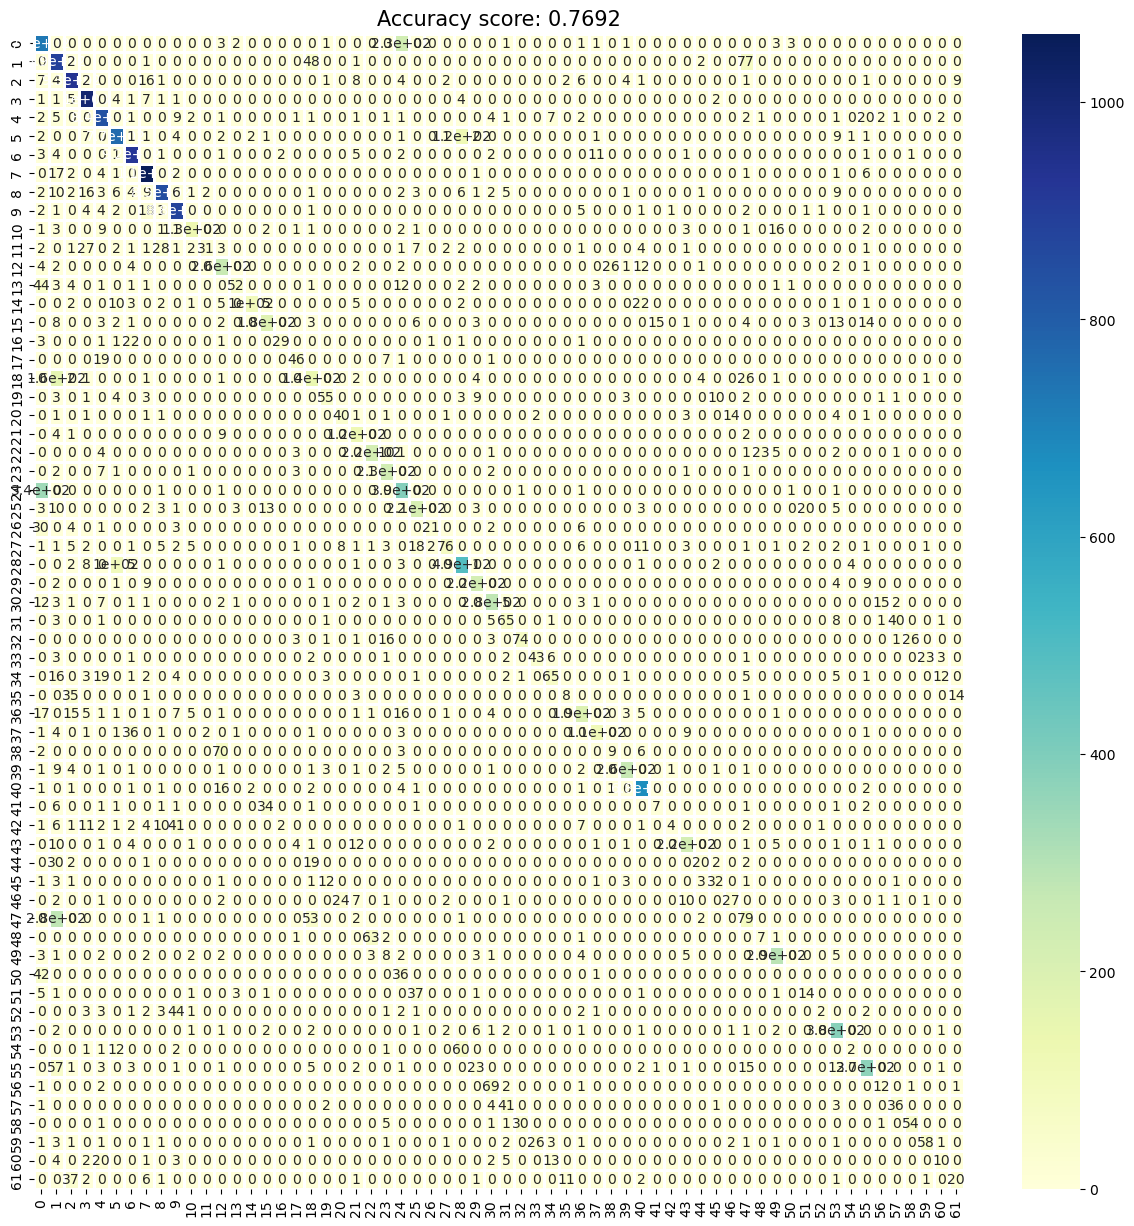

In [30]:
plt.figure(figsize=(15,15))
sns.heatmap(cm_knn, annot = True, linewidth =1, cmap= 'YlGnBu')
plt.ylabel=('Actual Label');
plt.xlabel=('Predicted label');
all_sample_title = 'Accuracy score: {0}'.format(accuracy_knn)
plt.title(all_sample_title, size = 15);

##### Fine Tuned Model

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

knn = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

grid_search = GridSearchCV(knn, param_grid, cv=Cross_Validation_Fold)
grid_search.fit(Scaled_Train_Images, Encoded_y_train)
best_params_knn1 = grid_search.best_params_
best_model = grid_search.best_estimator_

y_best_pred_knn1 = best_model.predict(Scaled_Test_Images)

print('Best parameters:', best_params_knn1)

accuracy_knn1 = accuracy_score(Encoded_y_test, y_best_pred_knn1)
print("Accuracy:", accuracy_knn1)

precision_knn1 = precision_score(Encoded_y_test, y_best_pred_knn1, average='weighted')
print("Precision:", precision_knn1)

recall_knn1 = recall_score(Encoded_y_test, y_best_pred_knn1, average='weighted')
print("Recall:", recall_knn1)

f1_knn1 = f1_score(Encoded_y_test, y_best_pred_knn1, average='weighted')
print("F1 Score:", f1_knn1)

print(classification_report(y_test, y_best_pred_knn1))

cm_knn1 = confusion_matrix(y_test, y_best_pred_knn1)
print(confusion_matrix(y_test, y_best_pred_knn1))

Best parameters: {'n_neighbors': 7, 'p': 2, 'weights': 'distance'}
Accuracy: 0.77335
Precision: 0.7633499823272847
Recall: 0.77335
F1 Score: 0.7578332118995986
              precision    recall  f1-score   support

           0       0.60      0.73      0.66       976
           1       0.58      0.86      0.69      1023
           2       0.89      0.93      0.91      1003
           3       0.93      0.97      0.95      1035
           4       0.90      0.92      0.91       903
           5       0.85      0.82      0.84       928
           6       0.91      0.96      0.93       959
           7       0.93      0.97      0.95      1098
           8       0.94      0.90      0.92       941
           9       0.87      0.96      0.91       929
          10       0.86      0.74      0.79       170
          11       0.89      0.26      0.41       118
          12       0.68      0.83      0.75       316
          13       0.88      0.41      0.56       128
          14       0.98      

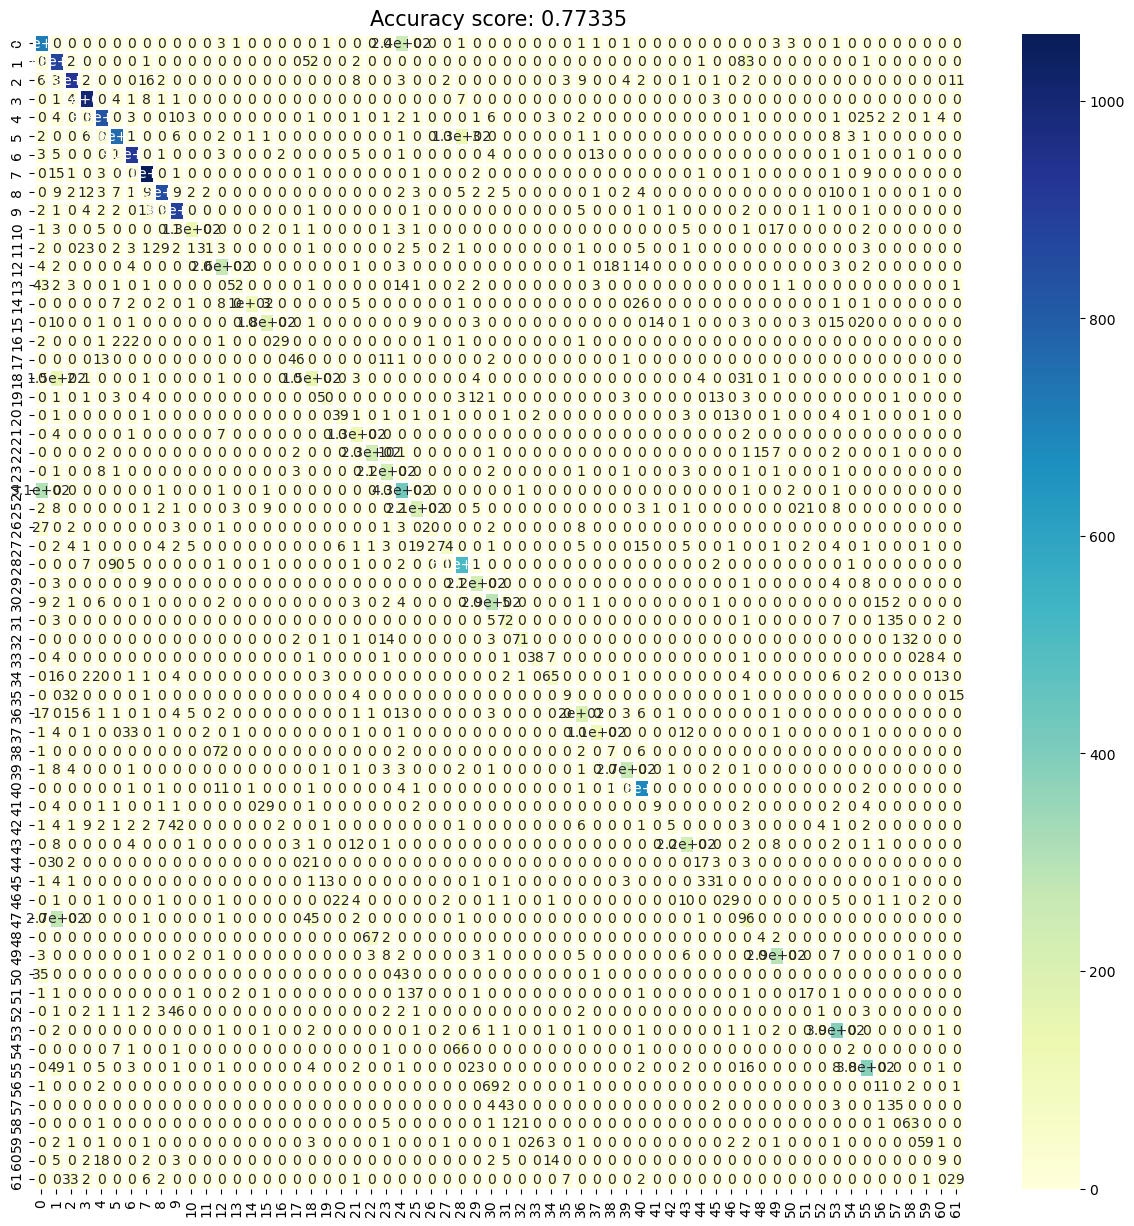

In [32]:
plt.figure(figsize=(15,15))
sns.heatmap(cm_knn1, annot = True, linewidth =1, cmap= 'YlGnBu')
plt.ylabel=('Actual Label');
plt.xlabel=('Predicted label');
all_sample_title = 'Accuracy score: {0}'.format(accuracy_knn1)
plt.title(all_sample_title, size = 15);

### Comparitive Evaluation

In [34]:
# Summary of the evaluation metrics in a tabular format.
data = {
    'Model': ['Naive Bayes', 'Random Forest', 'KNN'],
    'Accuracy before tuning ': [accuracy_nb, accuracy_rf, accuracy_knn],
    'Accuracy after tuning ': [accuracy_nb1, accuracy_rf1, accuracy_knn1],
    'Precision before tuning': [precision_nb, precision_rf, precision_knn],
    'Precision after tuning': [precision_nb1, precision_rf1, precision_knn1],
    'Recall before tuning': [recall_nb, recall_rf, recall_knn],
    'Recall after tuning': [recall_nb1, recall_rf1, recall_knn1],
    'F1 before tuning': [f1_nb, f1_rf, f1_knn],
    'F1 after tuning': [f1_nb1, f1_rf1, f1_knn1]
}

table = pd.DataFrame(data)
print(table)

           Model  Accuracy before tuning   Accuracy after tuning   \
0    Naive Bayes                   0.5172                 0.51720   
1  Random Forest                   0.7947                 0.79875   
2            KNN                   0.7692                 0.77335   

   Precision before tuning  Precision after tuning  Recall before tuning  \
0                 0.598634                0.598634                0.5172   
1                 0.777028                0.779370                0.7947   
2                 0.759387                0.763350                0.7692   

   Recall after tuning  F1 before tuning  F1 after tuning  
0              0.51720          0.536892         0.536892  
1              0.79875          0.771106         0.775015  
2              0.77335          0.753289         0.757833  


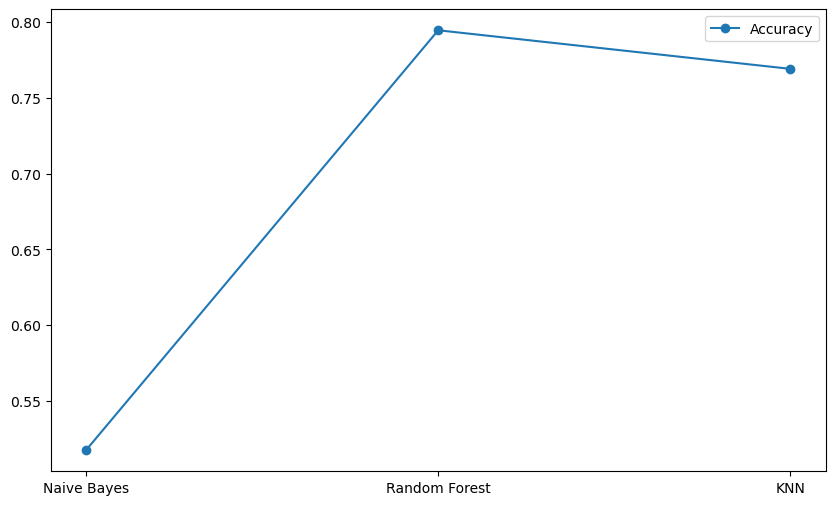

In [35]:
#Comparing Accuracy for all 3 models before tuning the hyperparameters
import matplotlib.pyplot as plt

#storing accuracy scores of different models
accuracy_all = [accuracy_nb, accuracy_rf, accuracy_knn]

# Models
models = ['Naive Bayes', 'Random Forest', 'KNN']

# Creating the line chart
plt.figure(figsize=(10, 6))

plt.plot(models, accuracy_all, marker='o', label='Accuracy')
plt.xlabel = ('Models');
plt.ylabel = ('Scores');
plt.title = ('Comparison of Accuracy before Hyperparameter tuning')

plt.legend()
plt.show()

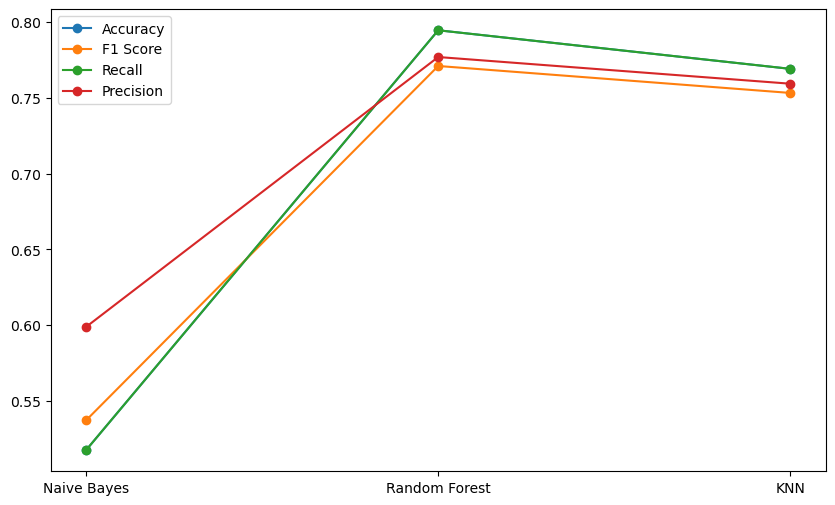

In [36]:
#Visualising the evaluation metrics before tuning.
import matplotlib.pyplot as plt

#storing accuracy scores of different models
accuracy_all = [accuracy_nb, accuracy_rf, accuracy_knn]

# storing precision scores of different models
precision_all = [precision_nb, precision_rf, precision_knn]

# storing recall scores of different models
recall_all = [recall_nb, recall_rf, recall_knn]

# storing f1 scores of different models
f1_all = [f1_nb, f1_rf, f1_knn]

# Models
models = ['Naive Bayes', 'Random Forest', 'KNN']

# Creating the line chart
plt.figure(figsize=(10, 6))

plt.plot(models, accuracy_all, marker='o', label='Accuracy')
plt.plot(models, f1_all, marker='o', label='F1 Score')
plt.plot(models, recall_all, marker='o', label='Recall')
plt.plot(models, precision_all, marker='o', label='Precision')

plt.xlabel = ('Models')
plt.ylabel = ('Scores')
plt.title = ('Comparison of Evaluation Metrics before Hyperparameter tuning')

plt.legend()
plt.show()

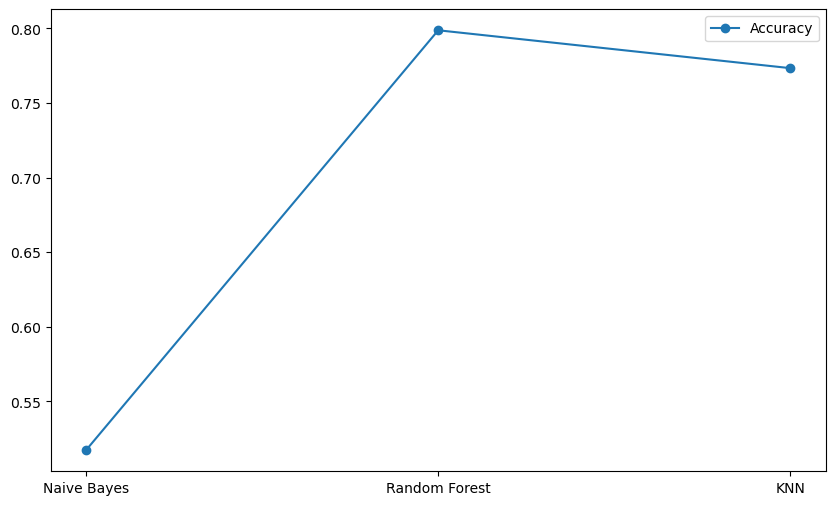

In [37]:
#Comparing Accuracy of all 3 models after tuning the hyperparameters
import matplotlib.pyplot as plt

#storing accuracy scores of different models
accuracy_all = [accuracy_nb1, accuracy_rf1, accuracy_knn1]

# Models
models = ['Naive Bayes', 'Random Forest', 'KNN']

# Creating the line chart
plt.figure(figsize=(10, 6))

plt.plot(models, accuracy_all, marker='o', label='Accuracy')
plt.xlabel = ('Models');
plt.ylabel = ('Scores');
plt.title = ('Comparison of Accuracy after Hyperparameter tuning')

plt.legend()
plt.show()

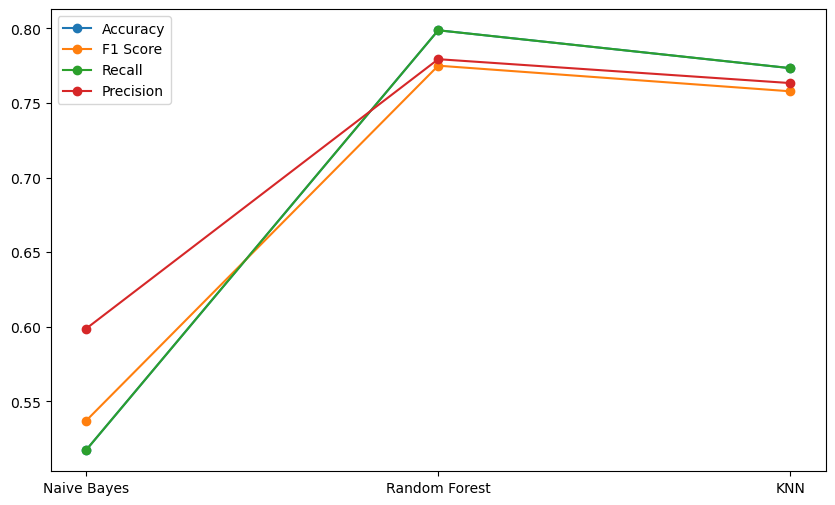

In [38]:
#Visualising the evaluation metrics of after tuning.
import matplotlib.pyplot as plt

#storing accuracy scores of different models
accuracy_all = [accuracy_nb1, accuracy_rf1, accuracy_knn1]

# storing precision scores of different models
precision_all = [precision_nb1, precision_rf1, precision_knn1]

# storing recall scores of different models
recall_all = [recall_nb1, recall_rf1, recall_knn1]

# storing f1 scores of different models
f1_all = [f1_nb1, f1_rf1, f1_knn1]

# Models
models = ['Naive Bayes', 'Random Forest', 'KNN']

# Creating the line chart
plt.figure(figsize=(10, 6))

plt.plot(models, accuracy_all, marker='o', label='Accuracy')
plt.plot(models, f1_all, marker='o', label='F1 Score')
plt.plot(models, recall_all, marker='o', label='Recall')
plt.plot(models, precision_all, marker='o', label='Precision')

plt.xlabel = ('Models')
plt.ylabel = ('Scores')
plt.title = ('Comparison of Evaluation Metrics after Hyperparameter tuning')

plt.legend()
plt.show()

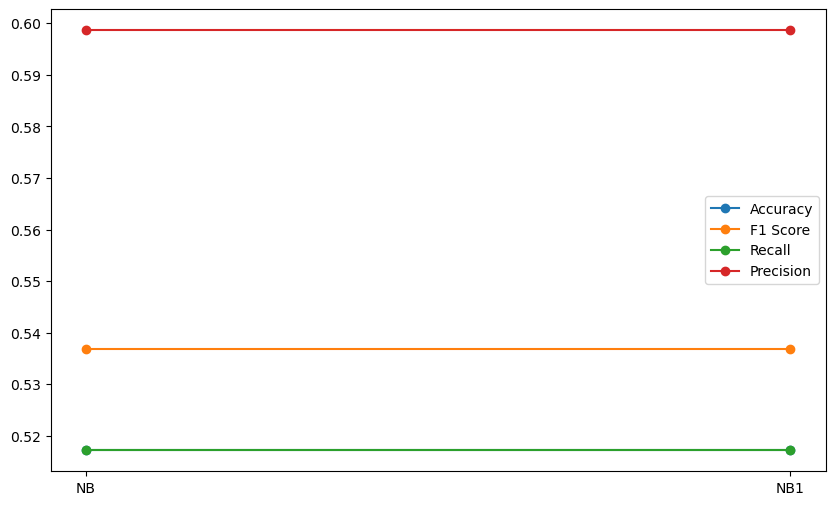

In [39]:
#Comparing NB before and after hyperparameter tuning
import matplotlib.pyplot as plt

#storing accuracy scores of different models
accuracy = [accuracy_nb, accuracy_nb1]

# storing precision scores of different models
precision = [precision_nb, precision_nb1]

# storing recall scores of different models
recall = [recall_nb, recall_nb1]

# storing f1 scores of different models
f1 = [f1_nb, f1_nb1]

models = ['NB', 'NB1']

# Creating the line chart
plt.figure(figsize=(10, 6))

plt.plot(models, accuracy, marker='o', label='Accuracy')
plt.plot(models, f1, marker='o', label='F1 Score')
plt.plot(models, recall, marker='o', label='Recall')
plt.plot(models, precision, marker='o', label='Precision')

plt.xlabel = ('Models');
plt.ylabel = ('Scores');
plt.title = ('Comparison of NB before and after Hyperparameter tuning')

plt.legend()
plt.show()

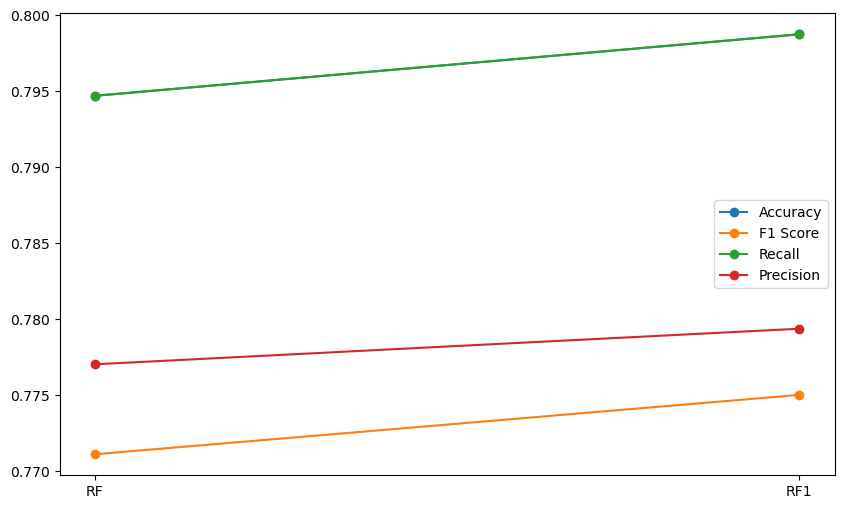

In [40]:
#Comparing RF before and after hyperparameter tuning
import matplotlib.pyplot as plt

#storing accuracy scores of different models
accuracy = [accuracy_rf, accuracy_rf1]

# storing precision scores of different models
precision = [precision_rf, precision_rf1]

# storing recall scores of different models
recall = [recall_rf, recall_rf1]

# storing f1 scores of different models
f1 = [f1_rf, f1_rf1]

models = ['RF', 'RF1']

# Creating the line chart
plt.figure(figsize=(10, 6))

plt.plot(models, accuracy, marker='o', label='Accuracy')
plt.plot(models, f1, marker='o', label='F1 Score')
plt.plot(models, recall, marker='o', label='Recall')
plt.plot(models, precision, marker='o', label='Precision')

plt.xlabel = ('Models');
plt.ylabel = ('Scores');
plt.title = ('Comparison of RF before and after Hyperparameter tuning')

plt.legend()
plt.show()

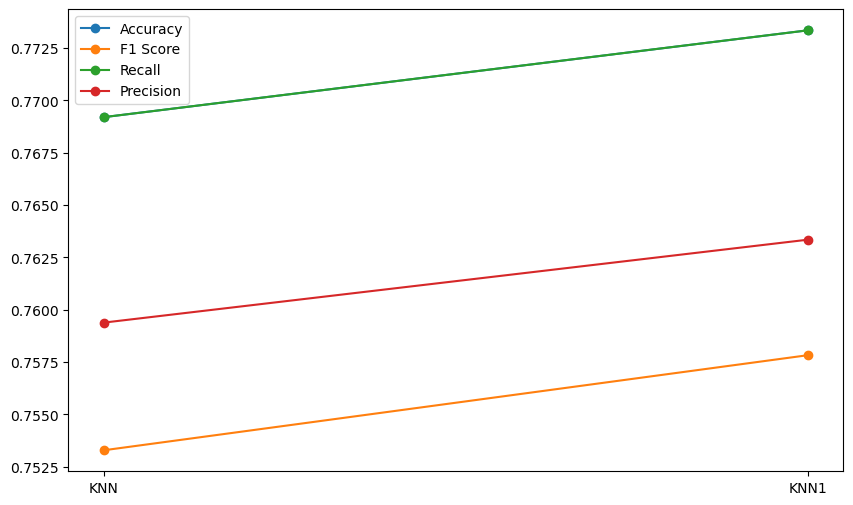

In [41]:
#Comparing KNN before and after hyperparameter tuning
import matplotlib.pyplot as plt

#storing accuracy scores of different models
accuracy = [accuracy_knn, accuracy_knn1]

# storing precision scores of different models
precision = [precision_knn, precision_knn1]

# storing recall scores of different models
recall = [recall_knn, recall_knn1]

# storing f1 scores of different models
f1 = [f1_knn, f1_knn1]

models = ['KNN', 'KNN1']

# Creating the line chart
plt.figure(figsize=(10, 6))

plt.plot(models, accuracy, marker='o', label='Accuracy')
plt.plot(models, f1, marker='o', label='F1 Score')
plt.plot(models, recall, marker='o', label='Recall')
plt.plot(models, precision, marker='o', label='Precision')

plt.xlabel = ('Models');
plt.ylabel = ('Scores');
plt.title = ('Comparison of KNN before and after Hyperparameter tuning')

plt.legend()
plt.show()

### Total Time taken to execute the file

In [42]:
End_Time = (time.time() - Initial_Time)
print('Execution time in seconds: ' + str(End_Time))

Execution time in seconds: 83822.536080122
